In [26]:
import numpy as np
from trajectories import *
from guided_ot import *
from simplicial_paths import *
import networkx as nx 

# Helper Functions

In [35]:
def plot_harmonic_bases(SC):
    node_pos = {i:SC.nodes[i] for i in (np.where(SC.node_vec == 1)[0])}
    for i in range(SC.num_holes):
        harm_vec = SC.H[i,:]
        harm_vec_sign = np.sign(harm_vec)
        harm_vec_weight = np.abs(harm_vec)
        G = SC.graph
        GG = nx.DiGraph()
        G_oriented = nx.DiGraph()
        j = 0
        for k, edge in enumerate(SC.edges):
            if not SC.edge_vec[k]:
                continue
            sign, weight = harm_vec_sign[j], harm_vec_weight[j] * 10
            oriented_edge = (edge[0], edge[1]) if (sign > 0) else (edge[1], edge[0])
            #print(edge, edge_sign, oriented_edge)
            G_oriented.add_edge(oriented_edge[0], oriented_edge[1], weight=weight)
            GG.add_edge(edge[0], edge[1], weight=weight)
            j += 1

        oriented_weights = [G_oriented[u][v]['weight'] for u,v in G_oriented.edges]

        plt.figure(figsize=(6,6))
        nx.draw(G_oriented, pos=node_pos, node_size=5, node_color='gray', width=oriented_weights, edge_color='black', arrows=True, arrowstyle="-|>", arrowsize=[7 * i for i in oriented_weights])
        plt.title(f"Basis corresponding to coordinate {i+1}")
        plt.show()

def path_interp_experiment(SC, start, end, ref_path, alphas, verbose=False):
    ref_path_proj = ref_path.edge_projections[-1]
    for alpha in alphas:
        path, cost = augmented_dijkstra(SC, start, end, ref_path_proj, alpha, verbose)
        plot_ref_vs_guided(SC, ref_path, path)
        path_proj = path.edge_projections[-1]
        print(f"alpha = {alpha}, final cost = {cost}")
        print(f"ref proj : {ref_path_proj}, path proj : {path_proj}")
        print(f"proj diff: {np.linalg.norm(ref_path_proj - path_proj)}")
        print("-*-*"*30 + "-")

# Simple Experiment

In [28]:
pts = np.array([(1,0), (0,1),  (0,-1), (-2, -1)])
SC = SimplicialComplex(pts, True)
all_edges = np.array([0,1,2,3,4])
edges_to_add = {1:set(all_edges)}
coord_pairs = [[tuple(SC.nodes[i]), tuple(SC.nodes[j]), (i,j)] for (i,j) in SC.edges]
SC.add_simplices(edges_to_add)

0-1-3


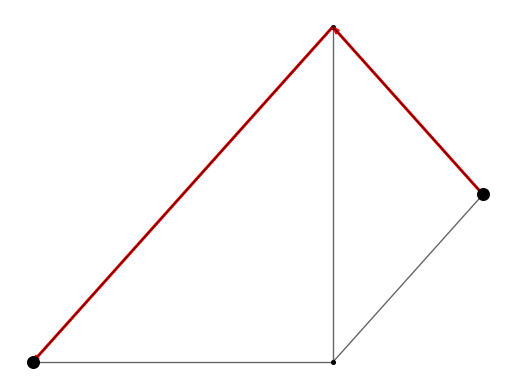

In [29]:
ref_path_class = Trajectory_Class(SC)
ref_path_coords = [(1,0), (0,1), (-2,-1)]
ref_path_class.generate_paths(ref_path_coords, 1, 1, 0)
ref_path_class.plot_paths('red', 'ref_path')
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]
print(ref_path)

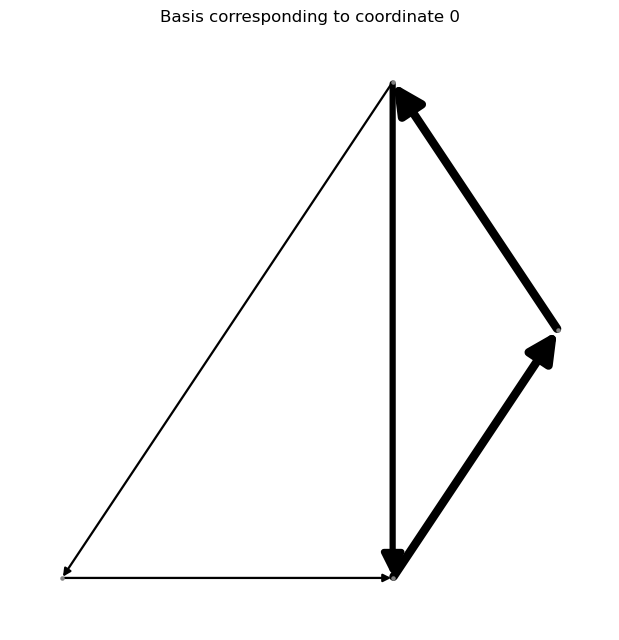

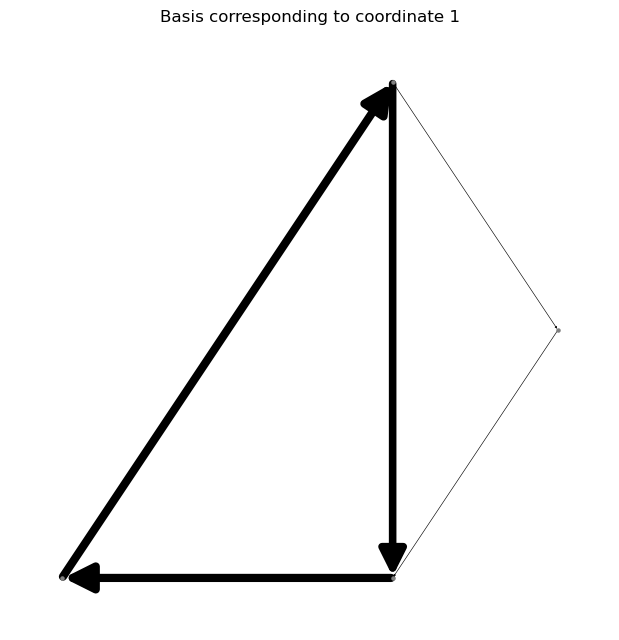

In [31]:
plot_harmonic_bases(SC)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 0 with cost 0
curr neighbor = 1, curr cost = inf, new cost : 1.4915036053180506
curr proj diff = inf, new proj diff = 0.375
curr neighbor = 2, curr cost = inf, new cost : 1.9037171676911457
curr proj diff = inf, new proj diff = 2.375
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 1 with cost 1.4915036053180506
curr neighbor = 2, curr cost = 1.9037171676911457, new cost : 3.6976103865045977
curr proj diff = 2.375, new proj diff = 1.375
curr neighbor = 3, curr cost = inf, new cost : 4.242640687119286
curr proj diff = inf, new proj diff = 0.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 2 with cost 1.9037171676911457
curr neighbor = 3, curr cost = 4.242640687119286, new cost : 4.238640687119285
curr proj diff = 0.0, new proj diff = 4.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 3 with cost 4.238640687119285
=== Dijkstra's 

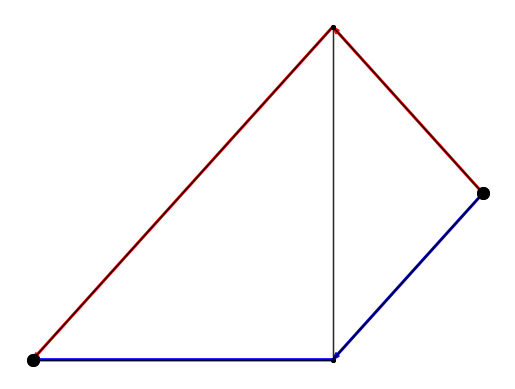

alpha = 0.20610678118654757, final cost = 4.238640687119285
ref proj : [ 0.77244045 -0.6350872 ], path proj : [-0.77244045  0.6350872 ]
proj diff: 1.9999999999999998
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 0 with cost 0
curr neighbor = 1, curr cost = inf, new cost : 1.4916911053180506
curr proj diff = inf, new proj diff = 0.375
curr neighbor = 2, curr cost = inf, new cost : 1.9049046676911456
curr proj diff = inf, new proj diff = 2.375
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 1 with cost 1.4916911053180506
curr neighbor = 2, curr cost = 1.9049046676911456, new cost : 3.698297886504598
curr proj diff = 2.375, new proj diff = 1.375
curr neighbor = 3, curr cost = inf, new cost : 4.242640687119286
curr proj diff = inf, new proj diff = 0.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

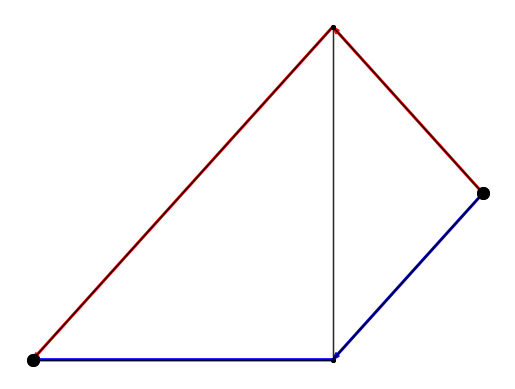

alpha = 0.20660678118654757, final cost = 4.240640687119285
ref proj : [ 0.77244045 -0.6350872 ], path proj : [-0.77244045  0.6350872 ]
proj diff: 1.9999999999999998
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 0 with cost 0
curr neighbor = 1, curr cost = inf, new cost : 1.4918786053180504
curr proj diff = inf, new proj diff = 0.375
curr neighbor = 2, curr cost = inf, new cost : 1.9060921676911455
curr proj diff = inf, new proj diff = 2.375
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 1 with cost 1.4918786053180504
curr neighbor = 2, curr cost = 1.9060921676911455, new cost : 3.6989853865045976
curr proj diff = 2.375, new proj diff = 1.375
curr neighbor = 3, curr cost = inf, new cost : 4.242640687119286
curr proj diff = inf, new proj diff = 0.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

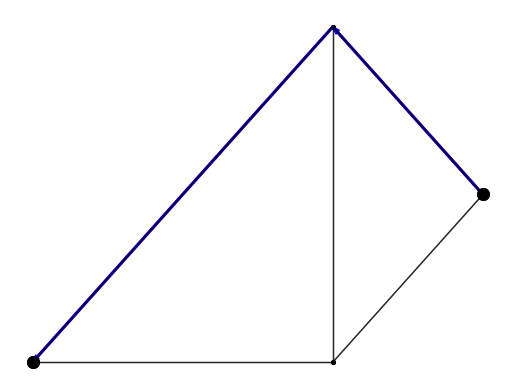

alpha = 0.20710678118654757, final cost = 4.242640687119286
ref proj : [ 0.77244045 -0.6350872 ], path proj : [ 0.77244045 -0.6350872 ]
proj diff: 0.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 0 with cost 0
curr neighbor = 1, curr cost = inf, new cost : 1.4920661053180504
curr proj diff = inf, new proj diff = 0.375
curr neighbor = 2, curr cost = inf, new cost : 1.9072796676911457
curr proj diff = inf, new proj diff = 2.375
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 1 with cost 1.4920661053180504
curr neighbor = 2, curr cost = 1.9072796676911457, new cost : 3.699672886504598
curr proj diff = 2.375, new proj diff = 1.375
curr neighbor = 3, curr cost = inf, new cost : 4.242640687119286
curr proj diff = inf, new proj diff = 0.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 2

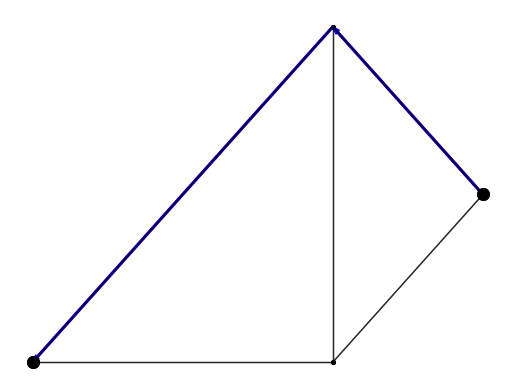

alpha = 0.20760678118654757, final cost = 4.242640687119286
ref proj : [ 0.77244045 -0.6350872 ], path proj : [ 0.77244045 -0.6350872 ]
proj diff: 0.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 0 with cost 0
curr neighbor = 1, curr cost = inf, new cost : 38.91421356237309
curr proj diff = inf, new proj diff = 0.375
curr neighbor = 2, curr cost = inf, new cost : 238.9142135623731
curr proj diff = inf, new proj diff = 2.375
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 1 with cost 38.91421356237309
curr neighbor = 2, curr cost = 238.9142135623731, new cost : 140.9142135623731
curr proj diff = 2.375, new proj diff = 1.375
curr neighbor = 3, curr cost = inf, new cost : 4.242640687119286
curr proj diff = inf, new proj diff = 0.0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
visiting 3 wit

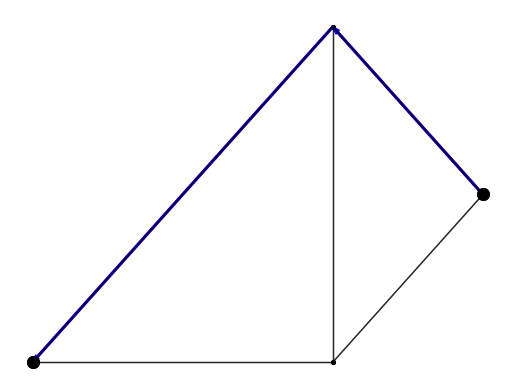

alpha = 100.0, final cost = 4.242640687119286
ref proj : [ 0.77244045 -0.6350872 ], path proj : [ 0.77244045 -0.6350872 ]
proj diff: 0.0
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [32]:
alpha_star = (np.sqrt(2)-1)/2
alphas = alpha_star + np.arange(-1e-3, 1e-3, 5e-4)
alphas = np.hstack([alphas, [100]])
start, end = 0, len(SC.node_vec)-1

path_interp_experiment(SC, start, end, ref_path, alphas, True)

# Simple example 2

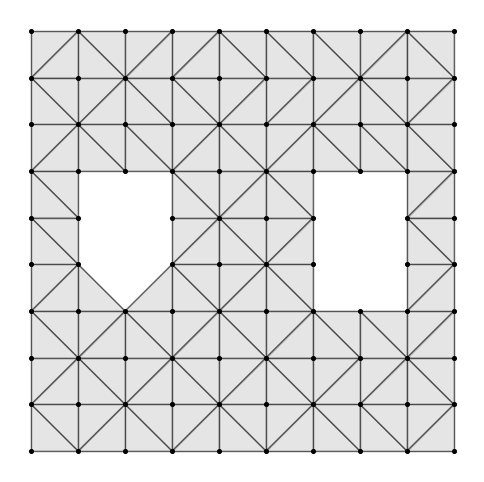

In [22]:
n_side, point_gen_mode = 10, 0

r1, r2 = 0.6, 0.2
n_holes = 2
angle = 2 * np.pi / n_holes
phase = 0 #np.pi/4
hole_locs = [(r1 * np.cos(angle * i + phase), r1 * np.sin(angle * i + phase)) for i in range(n_holes)]

# Initialize Simplicial Complex (SC)

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r2)
plt.figure(figsize=(6,6))
SC.plot()

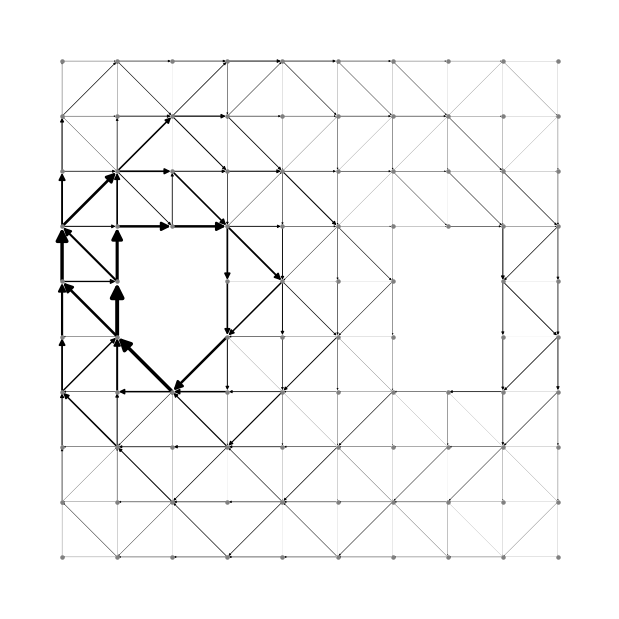

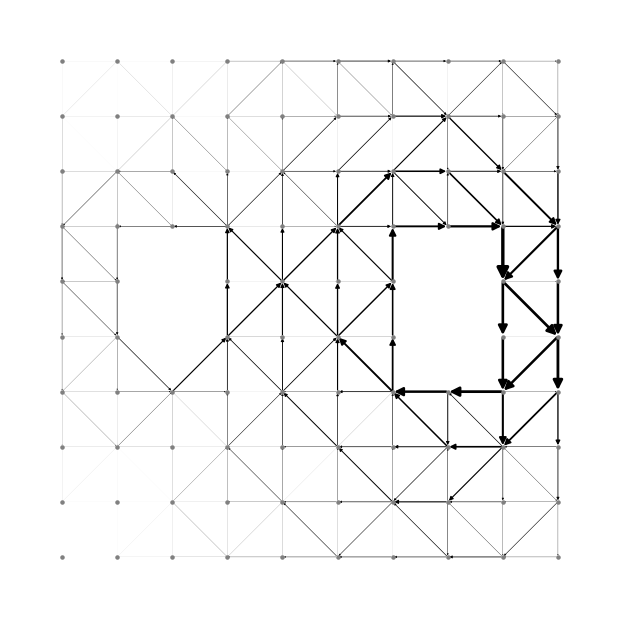

In [23]:
plot_harmonic_bases(SC)

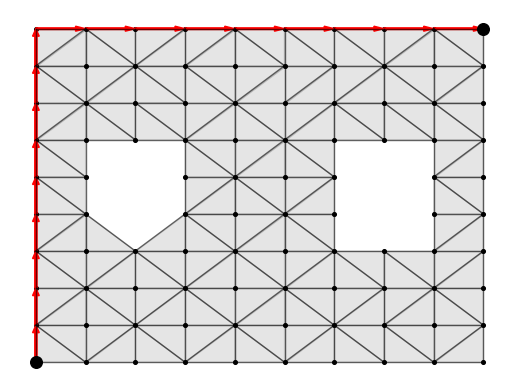

In [24]:
ref_path_coords = [(-1,-1), (-1, 1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]
ref_path_class.plot_paths('red', 'ref')

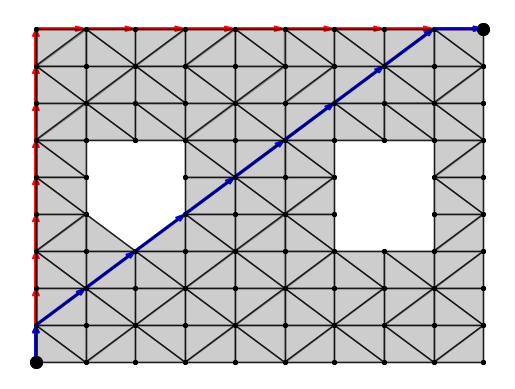

alpha = 0.0, final cost = 2.9586018886632797
ref proj : [1.24779155 0.09034622], path proj : [-0.28070396  0.56269432]
proj diff: 1.599816014223022
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


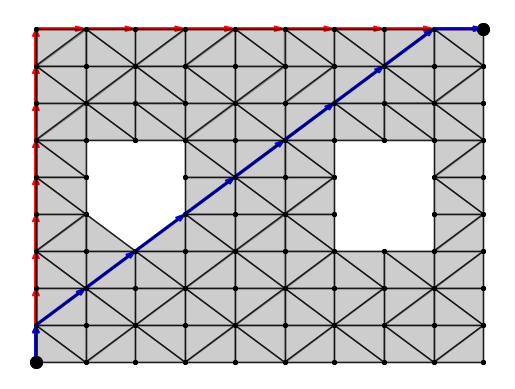

alpha = 0.1, final cost = 3.2145428886632796
ref proj : [1.24779155 0.09034622], path proj : [-0.28070396  0.56269432]
proj diff: 1.599816014223022
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


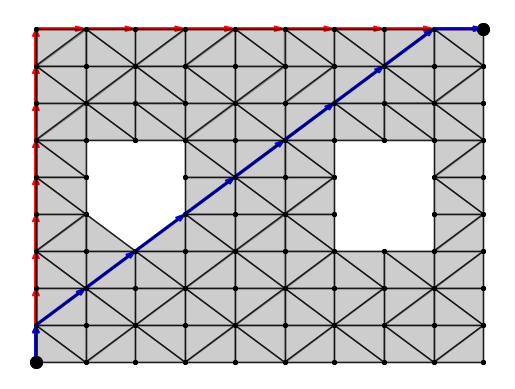

alpha = 0.2, final cost = 3.4704838886632796
ref proj : [1.24779155 0.09034622], path proj : [-0.28070396  0.56269432]
proj diff: 1.599816014223022
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


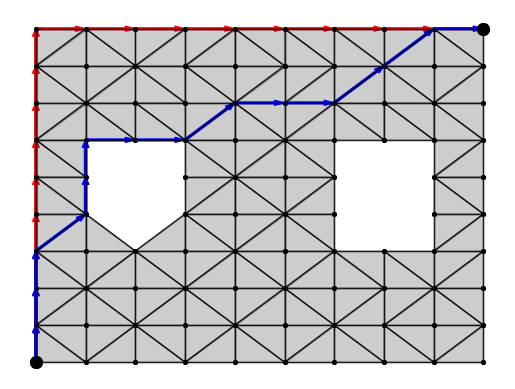

alpha = 0.30000000000000004, final cost = 3.47930094433164
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 1.9540102647498285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


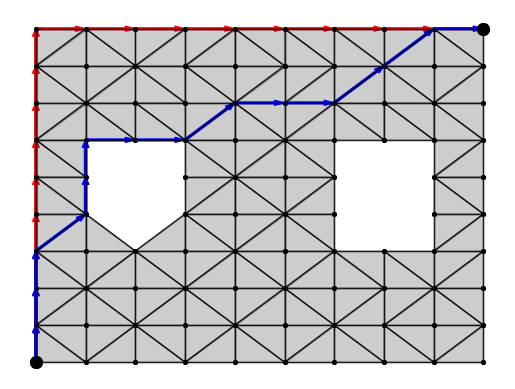

alpha = 0.4, final cost = 3.47930094433164
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 1.9540102647498285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


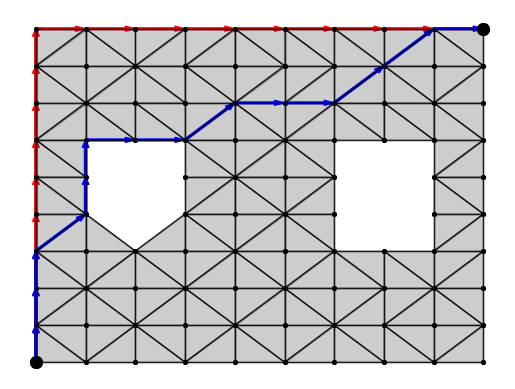

alpha = 0.5, final cost = 3.47930094433164
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 1.9540102647498285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


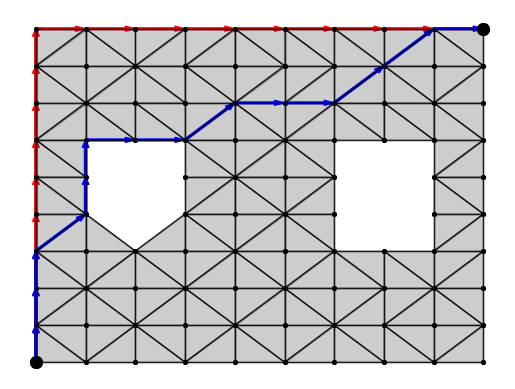

alpha = 0.6000000000000001, final cost = 3.47930094433164
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 1.9540102647498285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


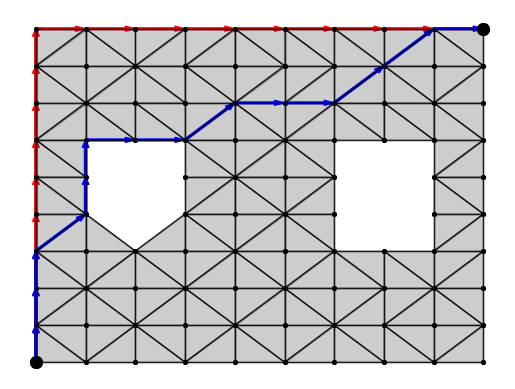

alpha = 0.7000000000000001, final cost = 3.47930094433164
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 1.9540102647498285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


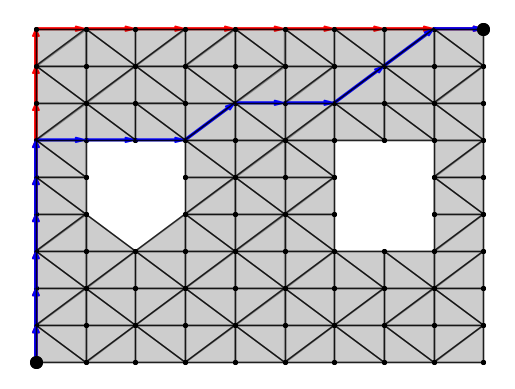

alpha = 0.8, final cost = 3.6094757082487297
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 2.5066604164831255e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


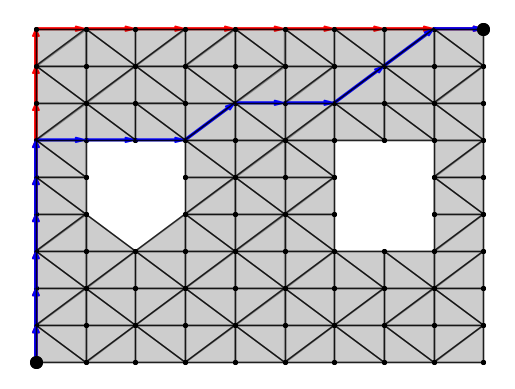

alpha = 0.9, final cost = 3.6094757082487297
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 2.5066604164831255e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


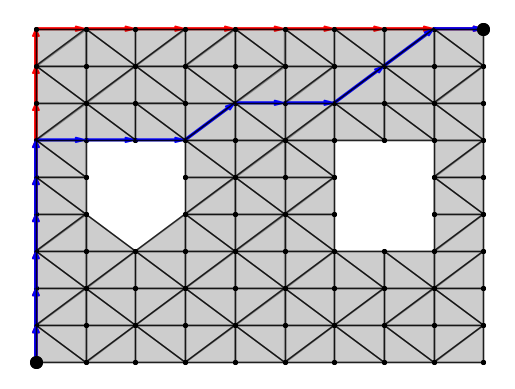

alpha = 1.0, final cost = 3.6094757082487297
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 2.5066604164831255e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


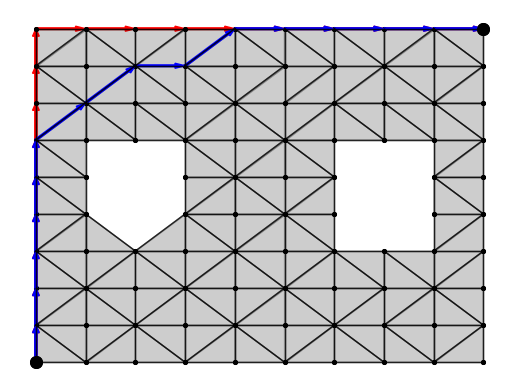

alpha = 100.0, final cost = 3.6094757082487305
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 5.828670879282072e-16
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


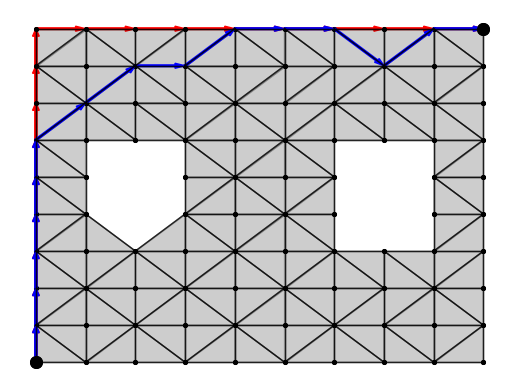

alpha = 1000.0, final cost = 3.7935706248589947
ref proj : [1.24779155 0.09034622], path proj : [1.24779155 0.09034622]
proj diff: 8.604228440844963e-16
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [25]:
start, end = 0, len(SC.node_vec)-1
alphas = np.arange(0, 1.1, 0.1)
alphas = np.hstack([alphas, [100, 1000]])

path_interp_experiment(SC, start, end, ref_path, alphas, False)

# Realistic Example 1

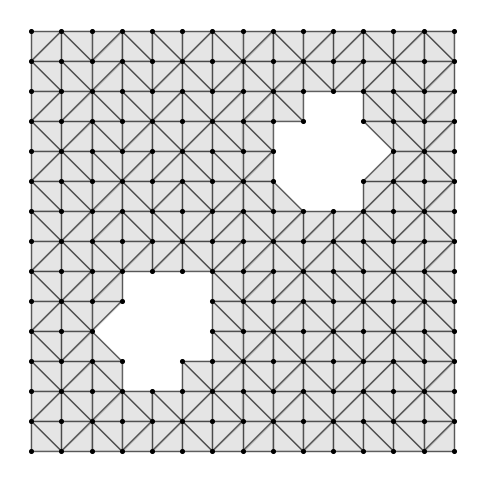

In [16]:
n_side, point_gen_mode = 15, 0

r1, r2 = 0.6, 0.2
n_holes = 2
angle = 2 * np.pi / n_holes
phase = np.pi/4
hole_locs = [(r1 * np.cos(angle * i + phase), r1 * np.sin(angle * i + phase)) for i in range(n_holes)]

# Initialize Simplicial Complex (SC)

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r2)
plt.figure(figsize=(6,6))
SC.plot()

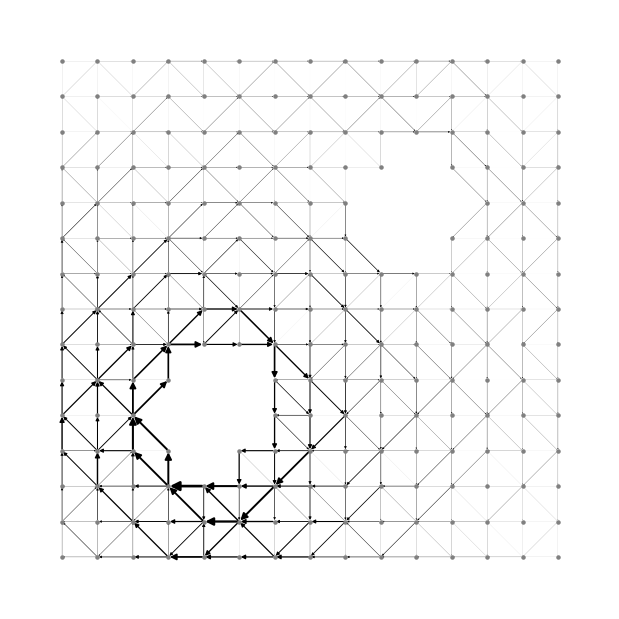

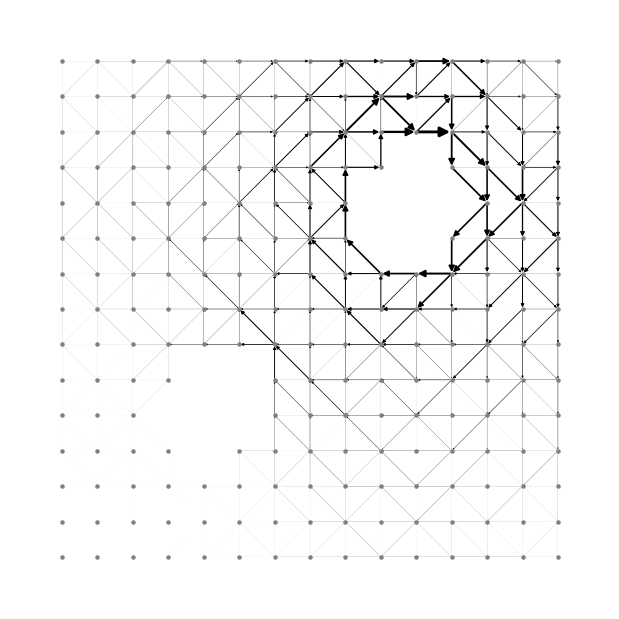

In [7]:
plot_harmonic_bases(SC)

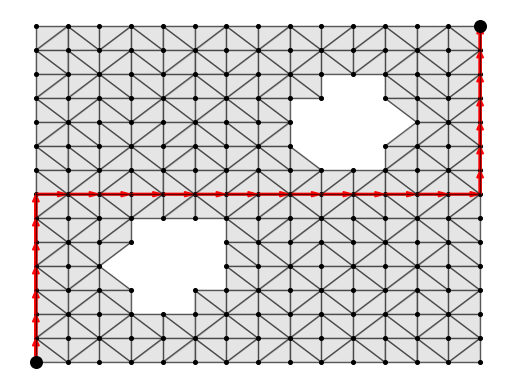

In [8]:
ref_path_coords = [(-1,-1), (-1, 0), (1, 0), (1,1)]
num_paths, num_nodes = 1, 1

ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]
ref_path_class.plot_paths('red', 'ref')

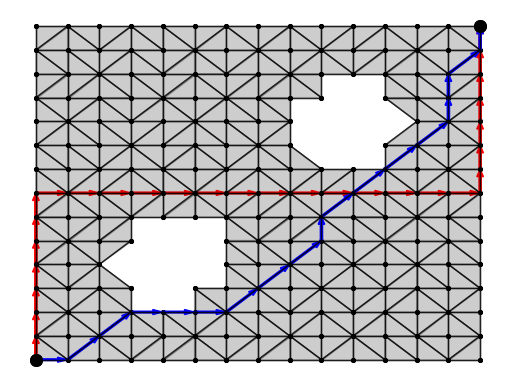

alpha = 0.0, final cost = 3.1631622319615635
ref proj : [ 0.77507193 -0.91405657], path proj : [-0.88019607 -0.65019094]
proj diff: 1.6761674213713933
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


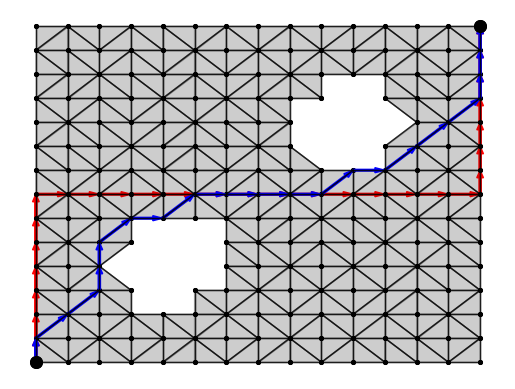

alpha = 0.1, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5055632627505204e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


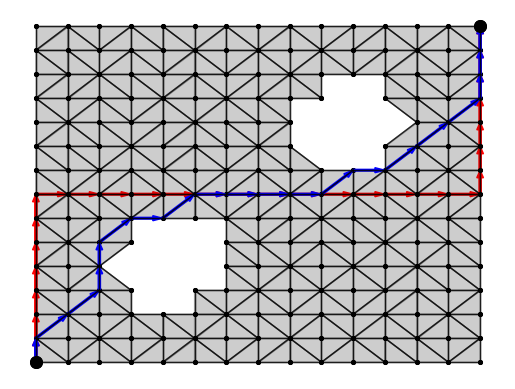

alpha = 0.2, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5055632627505204e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


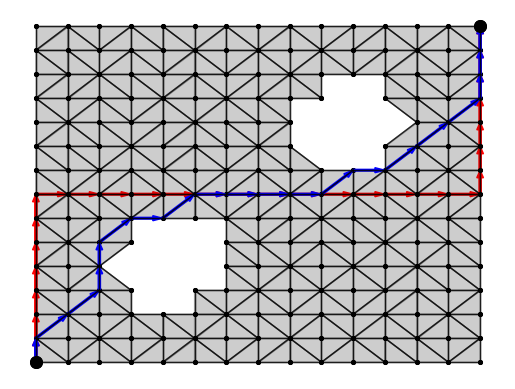

alpha = 0.30000000000000004, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5055632627505204e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


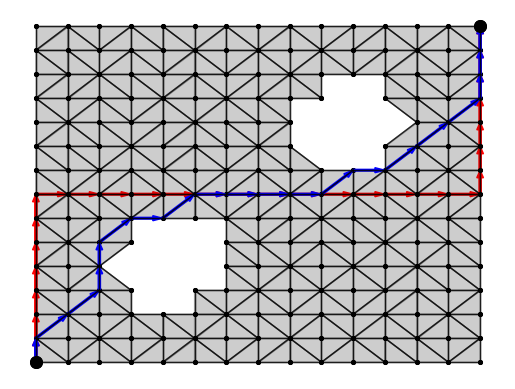

alpha = 0.4, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5055632627505204e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


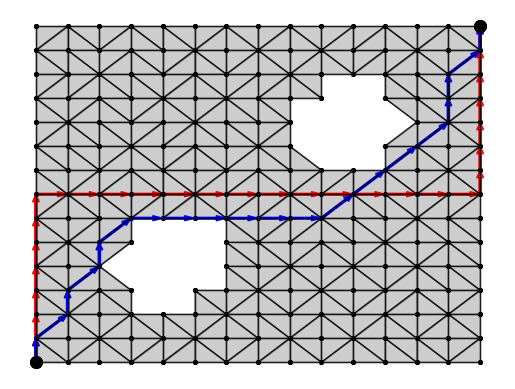

alpha = 0.5, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


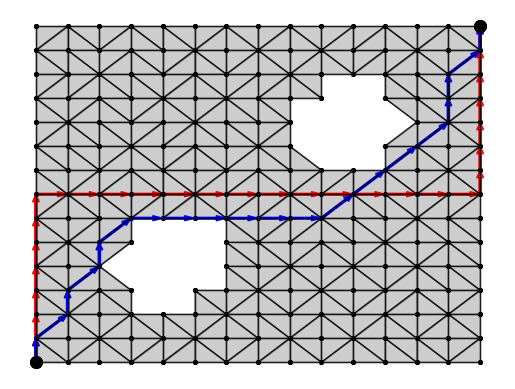

alpha = 0.6000000000000001, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


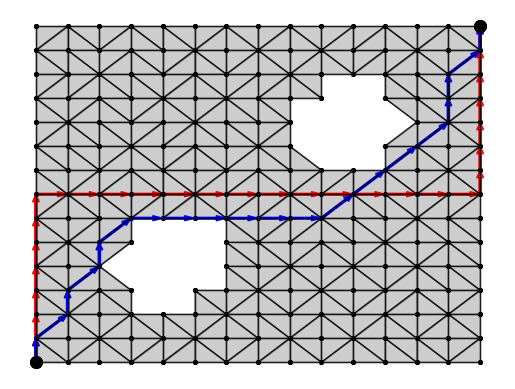

alpha = 0.7000000000000001, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


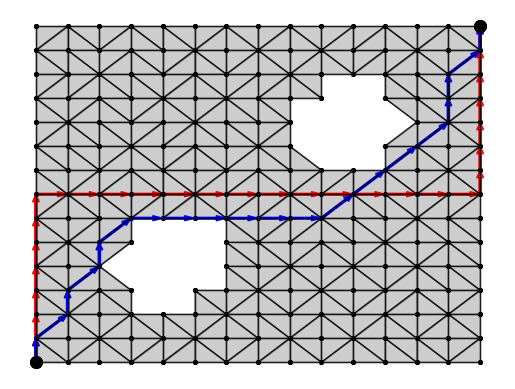

alpha = 0.8, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


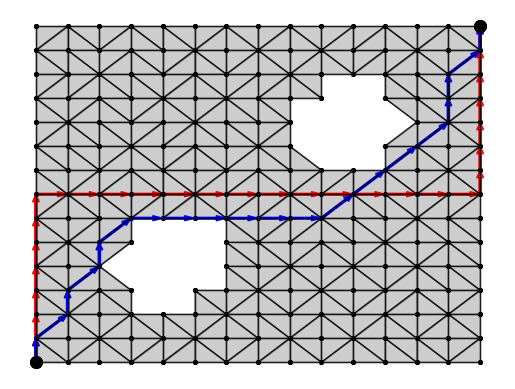

alpha = 0.9, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


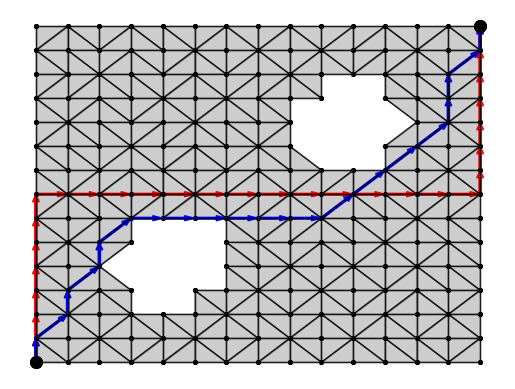

alpha = 1.0, final cost = 3.330529785569251
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 3.5283439685664285e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


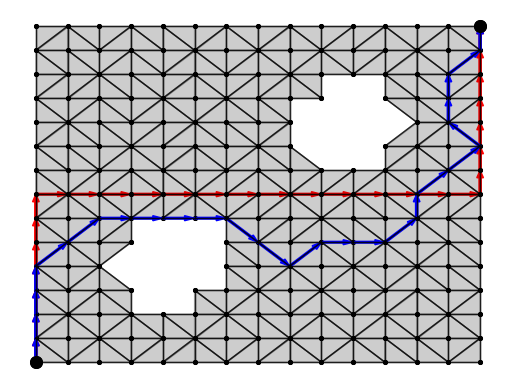

alpha = 100.0, final cost = 4.020305089104421
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 4.577566798522237e-16
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


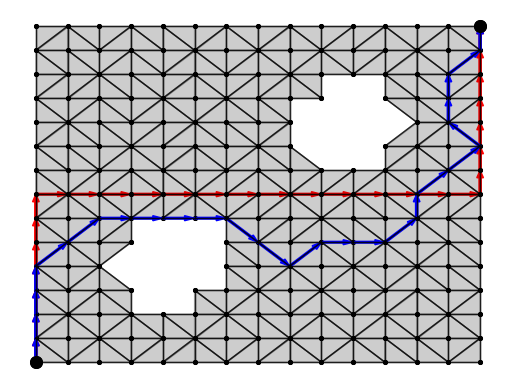

alpha = 1000.0, final cost = 4.020305089104421
ref proj : [ 0.77507193 -0.91405657], path proj : [ 0.77507193 -0.91405657]
proj diff: 4.577566798522237e-16
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [10]:
start, end = 0, len(SC.node_vec)-1
alphas = np.arange(0, 1.1, 0.1)
alphas = np.hstack([alphas, [100, 1000]])

path_interp_experiment(SC, start, end, ref_path, alphas, False)

# Realistic Example 2

In [36]:
n_side, point_gen_mode = 15, 0

r1, r2 = 0.6, 0.2
n_holes = 4
angle = 2 * np.pi / n_holes
phase = np.pi/4
hole_locs = [(r1 * np.cos(angle * i + phase), r1 * np.sin(angle * i + phase)) for i in range(n_holes)]

# Initialize Simplicial Complex (SC)

pts = generate_pts(point_gen_mode, n_side)
SC = SimplicialComplex(pts, True)
all_faces = np.arange(SC.face_vec.shape[0])
faces_to_add = {2:set(all_faces)}
SC.add_simplices(faces_to_add)
SC.make_holes(hole_locs, r2)

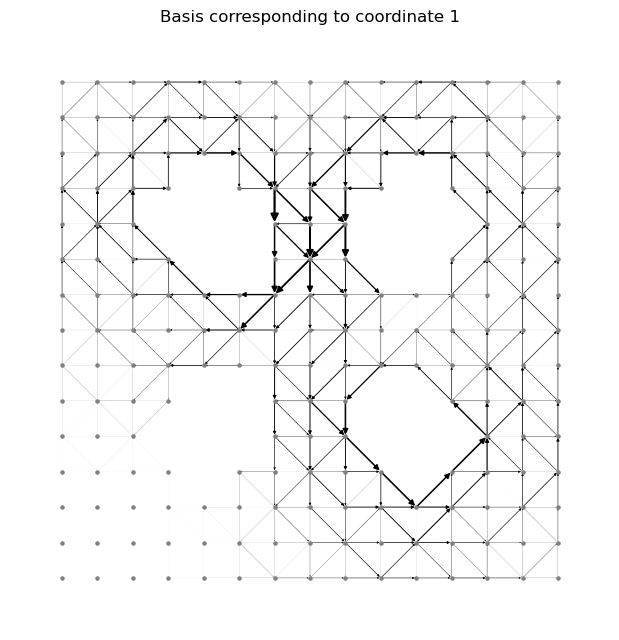

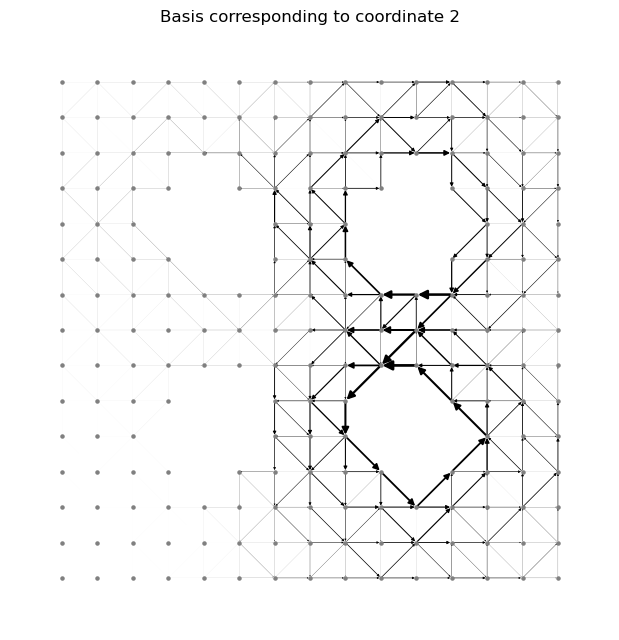

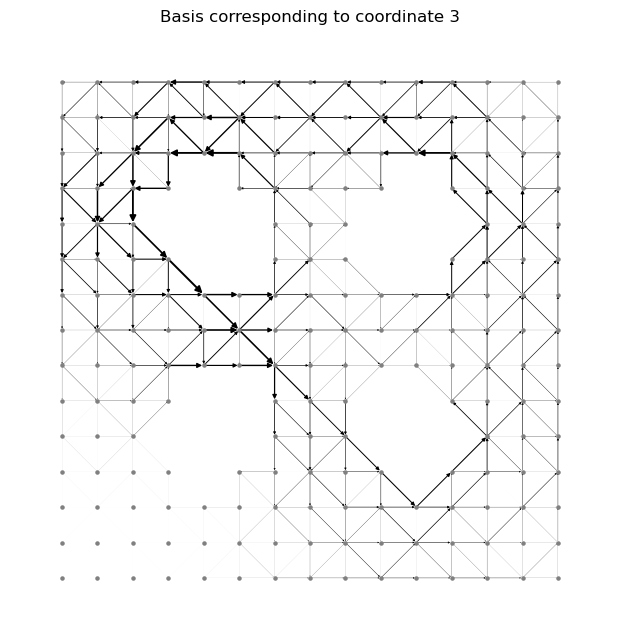

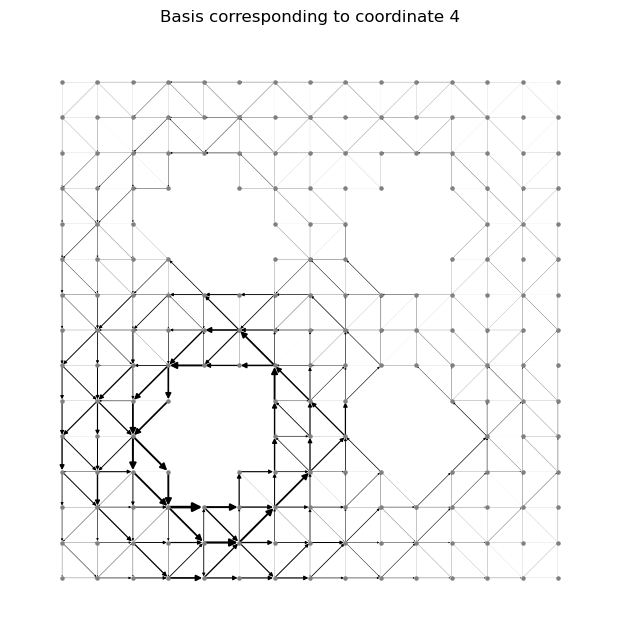

In [37]:
plot_harmonic_bases(SC)

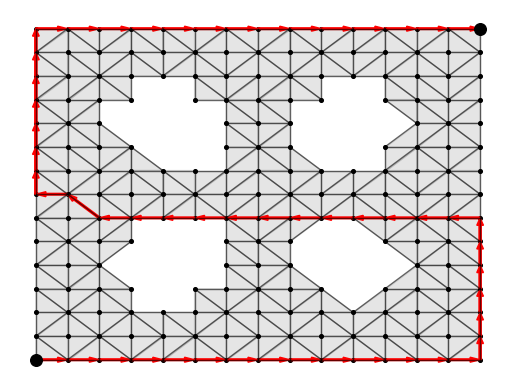

In [13]:
ref_path_coords = [(-1,-1), (1, -1), (1,-0.1), (-0.1,-0.1), (-1, 0), (-1,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]
ref_path_class.plot_paths('red', 'ref')

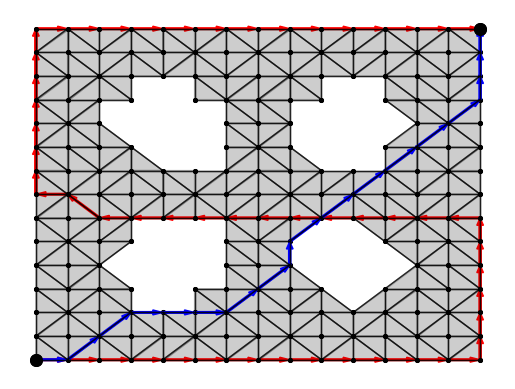

alpha = 0.0, final cost = 3.1631622319615644
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [-0.08061313 -0.99466968  0.24276714  0.88982762]
proj diff: 2.9982133737787735
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


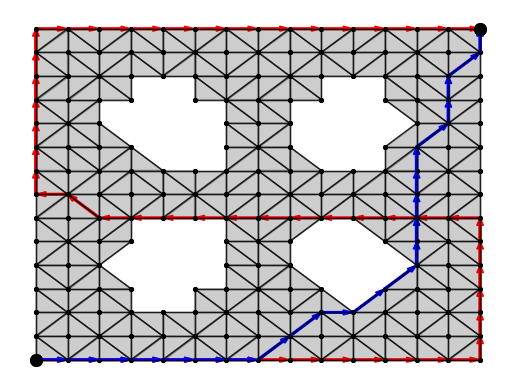

alpha = 0.1, final cost = 4.000192339176938
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [0.78945073 0.32225993 0.66763538 0.89336127]
proj diff: 2.2411946686622457
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


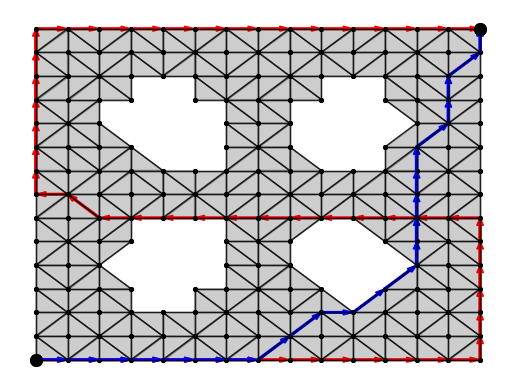

alpha = 0.2, final cost = 4.502487339176938
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [0.78945073 0.32225993 0.66763538 0.89336127]
proj diff: 2.2411946686622457
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


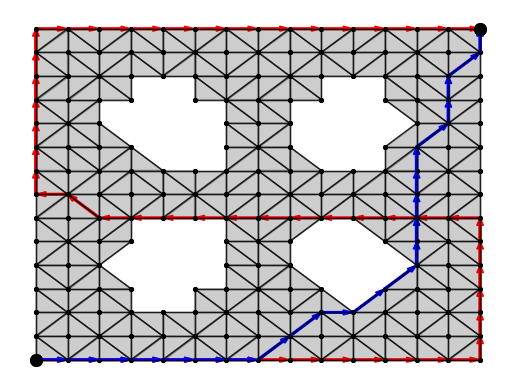

alpha = 0.30000000000000004, final cost = 5.004782339176939
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [0.78945073 0.32225993 0.66763538 0.89336127]
proj diff: 2.2411946686622457
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


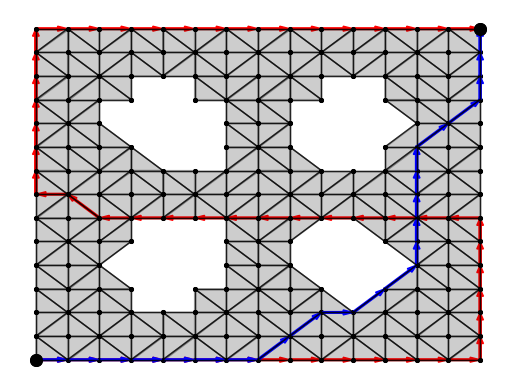

alpha = 0.4, final cost = 5.507077339176938
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [0.78945073 0.32225993 0.66763538 0.89336127]
proj diff: 2.241194668662245
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


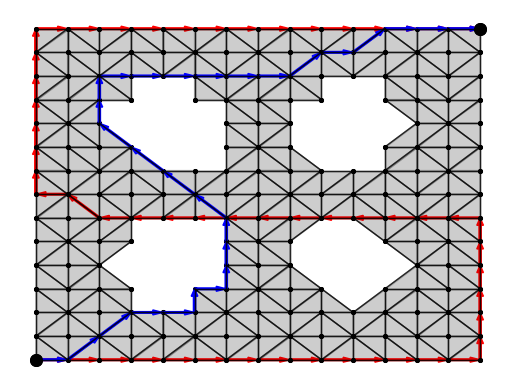

alpha = 0.5, final cost = 5.809306928426392
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 0.1565716  -0.01419731 -1.75853763  0.87757576]
proj diff: 1.63457647099698
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


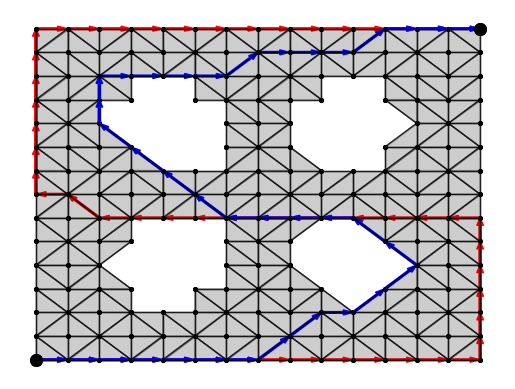

alpha = 0.6000000000000001, final cost = 5.852937535496733
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 5.183683495748049e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


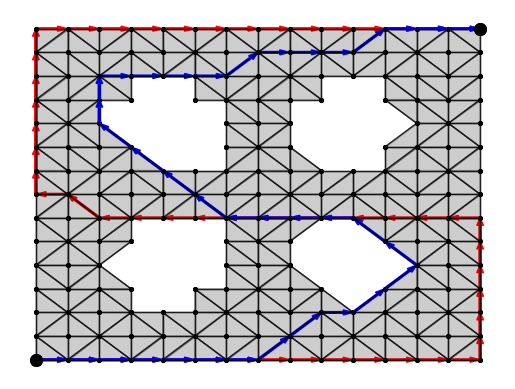

alpha = 0.7000000000000001, final cost = 5.852937535496733
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 5.183683495748049e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


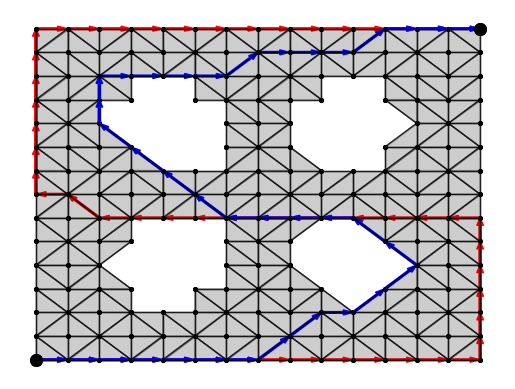

alpha = 0.8, final cost = 5.852937535496733
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 5.183683495748049e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


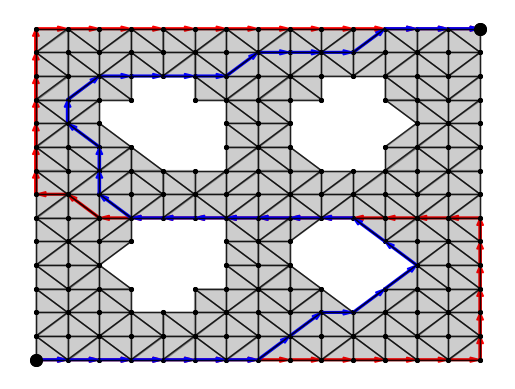

alpha = 0.9, final cost = 6.222335598014863
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 6.2291328269317324e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


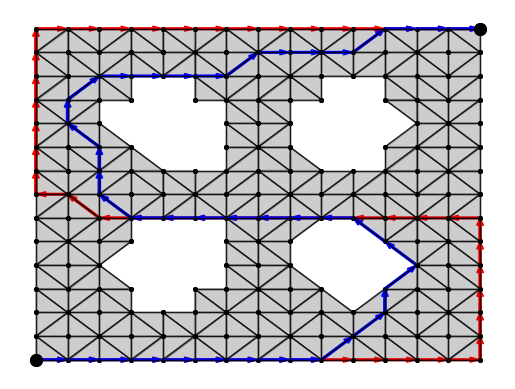

alpha = 1.0, final cost = 6.306019374818706
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 6.299965420058443e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


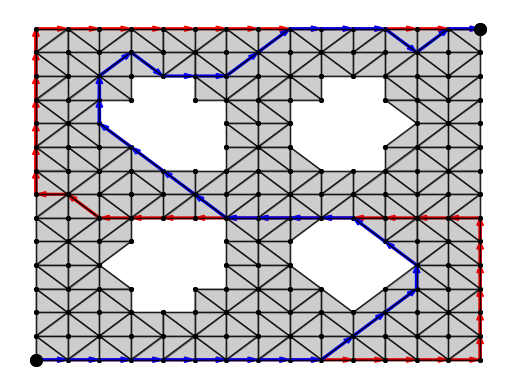

alpha = 100.0, final cost = 6.173314776513777
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 4.604414927850735e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


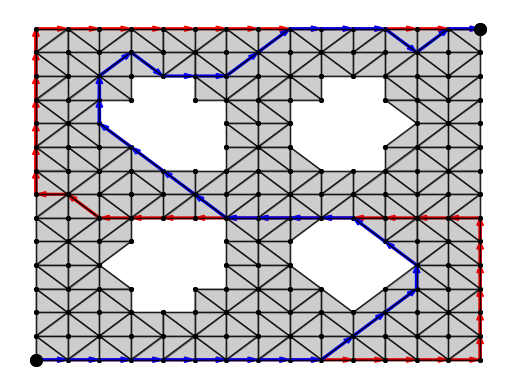

alpha = 1000.0, final cost = 6.173314776513777
ref proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941], path proj : [ 1.02663546  1.3027323  -1.33366939  0.88110941]
proj diff: 4.604414927850735e-15
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [14]:
start, end = 0, len(SC.node_vec)-1
alphas = np.arange(0, 1.1, 0.1)
alphas = np.hstack([alphas, [100, 1000]])

path_interp_experiment(SC, start, end, ref_path, alphas, False)

# Alphas Experiment

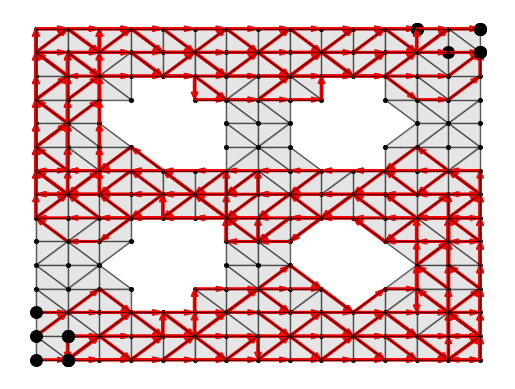

In [39]:
ref_path_coords = [(-1,-1), (1, -1), (1,-0.1), (-0.1,-0.1), (-1, 0), (-1,1), (1,1)]
num_paths, num_nodes = 1, 1

ref_path_class = Trajectory_Class(SC)
ref_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
ref_path = ref_path_class.paths[0]
ref_path_proj = ref_path.edge_projections[-1]

alpha = 100

start, end = 0, len(SC.node_vec)-1
best_path, _ = augmented_dijkstra(SC, start, end, ref_path_proj, alpha)

ref_path_coords = [(-1,-1), (1, -1), (1,-0.1), (-0.1,-0.1), (-1, 0), (-1,1), (1,1)]

In [ ]:
num_paths, num_nodes = 10, 5
similar_path_class = Trajectory_Class(SC)
similar_path_class.generate_paths(ref_path_coords, num_paths, num_nodes, 1e-1)
similar_path_class.plot_paths('red', 'similar')

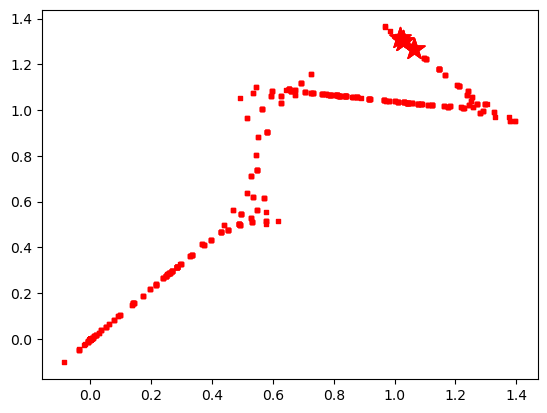

In [41]:
similar_path_class.plot_projections('red', 'similar')

#visit_weight = 1e-2
#holder = Trajectory_Holder(SC, [], 0, None, None, None, visit_weight)
#path_class_1 = Trajectory_Class(SC)
#path_class_2.generate_paths(path.path_coords,, )

In [ ]:
    ref_path_class = Trajectory_Class(SC)
    ref_path_class.generate_paths(ref_path_coords, 1, 1, 0)
    ref_path = ref_path_class.paths[0]
    ref_path_proj = ref_path.edge_projections[-1]

    # Make best path class
    best_path_class = Trajectory_Class(SC)
    best_path_class.paths.append(best_path)

    # Make similar path class
    similar_path_class = Trajectory_Class(SC)
    similar_path_class.generate_paths(path_template, num_paths, num_nodes, visit_weight)

    holder = Trajectory_Holder(SC)
    holder.add_class(ref_path_class, path_template, 'reference path', 'red')
    holder.add_class(best_path_class, best_path.path_coords, 'modified dijkstra path', 'blue')
    holder.add_class(similar_path_class, path_template, 'similar paths', 'green')

In [ ]:
def compare_cost_for_fixed_alpha(SC, best_path, path_template, alpha, num_paths=10, num_nodes=5, visit_weight=1e-1):
    # Make ref path class 
    ref_path_class = Trajectory_Class(SC)
    ref_path_class.generate_paths(path_template, 1, 1, 0)
    ref_path = ref_path_class.paths[0]
    ref_path_proj = ref_path.edge_projections[-1]

    # Make best path class
    best_path_class = Trajectory_Class(SC)
    best_path_class.paths.append(best_path)

    # Make similar path class
    similar_path_class = Trajectory_Class(SC)
    similar_path_class.generate_paths(path_template, num_paths, num_nodes, visit_weight)

    holder = Trajectory_Holder(SC)
    holder.add_class(ref_path_class, path_template, 'reference path', 'red')
    holder.add_class(best_path_class, best_path.path_coords, 'modified dijkstra path', 'blue')
    holder.add_class(similar_path_class, path_template, 'similar paths', 'green')
    

    def get_path_length(path):
        path_length_arr = [SC.graph[u][v]['weight'] for (u,v) in path.path_edges]
        path_length = np.sum(np.array(path_length_arr))
        return path_length

    def compute_cost(path):
        path_proj = path.edge_projections[-1]
        proj_diff = np.linalg.norm(path_proj - ref_path_proj) ** 2
        path_length = get_path_length(path)
        cost = path_length + alpha * proj_diff
        return cost

    best_traj_cost = compute_cost(best_path)
    other_trajectory_costs = [compute_cost(path) for path in similar_paths]

    return best_traj_cost, other_trajectory_costs